Задание:

* Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

* Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

* Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

* Желательно, но не обязательно: Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/german_used_cars.csv', index_col=0)


* Brand: The brand or manufacturer of the car.
* Model: The specific model of the car.
* Color: The color of the car’s exterior.
* Registration Date: The date when the car was registered (Month/Year).
* Year of Production: The year in which the car was manufactured.
* Price in Euro: The price of the car in Euros.
* Power: The power of the car in kilowatts (kW) and horsepower (ps).
* Transmission Type: The type of transmission (e.g., automatic, manual).
* Fuel Type: The type of fuel the car requires.
* Fuel Consumption: Information about the car’s fuel consumption in L/100km ang g/km.
* Mileage: The total distance traveled by the car in km.
* Offer Description: Additional description provided in the car offer.


In [ ]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


# 1. Очистка и подготовка данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  object

In [ ]:
df.describe()

,mileage_in_km
count,2.509270e+05
mean,8.534002e+04
std,7.871706e+04
min,0.000000e+00
25%,2.490400e+04
50%,6.750000e+04
75%,1.265000e+05
max,3.800000e+06


In [ ]:
df.isnull().sum()

,0
brand,0
model,0
color,166
registration_date,4
year,0
price_in_euro,0
power_kw,134
power_ps,129
transmission_type,0
fuel_type,0


Проблемы с датасетом:
* Brand: ок
* Model: ок
* Color: ок
* Registration Date: перевести в datetime
* Year of Production: перевести в int
* Price in Euro: перевести в numeric (int/float)
* Power: перевести в int
* Transmission Type: unknown перевести в np.nan
* Fuel Type: ок
* Fuel Consumption: убрать единицы измерения (L/100km и g/km) и перевести в numeric (int/float)
* Mileage: ок
* Offer Description: содержит текстовые данные, не представляющие интереса в рамках EDA.

Сначала удалим неинформативный столбец, затем будем выполнять очистку данных по столбцам, слева направо.

In [ ]:
df = df.drop(['offer_description'], axis=1)

In [ ]:
df['brand'].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df['model'].unique()

array(['Alfa Romeo GTV', 'Alfa Romeo 164', 'Alfa Romeo Spider', ...,
       'Volvo XC40', 'Volvo C40', 'Volvo'], dtype=object)

In [ ]:
df['color'].unique()

array(['red', 'black', 'silver', 'grey', 'white', 'beige', 'blue',
       'green', 'yellow', 'gold', 'brown', 'bronze', 'violet', 'orange',
       nan], dtype=object)

С первыми 3 столбцами все ок, посмотрим столбец Registration Date

In [ ]:
df['registration_date'].unique()

array(['10/1995', '02/1995', '07/1995', '11/1996', '04/1996', '12/1996',
       '07/1996', '01/1996', '02/1996', '10/1996', '05/1997', '06/1997',
       '10/1997', '03/1997', '01/1997', '02/1997', '04/1997', '07/1997',
       '09/1997', '07/1998', '05/1998', '01/1998', '11/1998', '09/1998',
       '07/1999', '02/1999', '06/1999', '12/1999', '05/1999', '01/1999',
       '04/1999', '03/1999', '10/2000', '06/2000', '05/2000', '01/2000',
       '04/2000', '11/2000', '03/2000', '02/2000', '09/2001', '02/2001',
       '03/2001', '01/2001', '11/2001', '12/2001', '04/2001', '05/2001',
       '07/2001', '06/2001', '10/2002', '12/2002', '01/2002', '09/2002',
       '11/2002', '06/2002', '03/2002', '02/2002', '05/2003', '10/2003',
       '07/2003', '02/2003', '01/2003', '03/2003', '08/2003', '06/2003',
       '03/2004', '02/2004', '09/2004', '04/2004', '08/2004', '01/2004',
       '11/2004', '06/2004', '10/2004', '12/2004', '07/2004', '05/2004',
       '10/2005', '06/2005', '07/2005', '09/2005', 

В столбце много данных из других столбцов. Следовательно, необходимо:

 1) выполнить очистку

 2) перевести столбец в формат datetime

In [ ]:
df.loc[df['registration_date'].str.contains(r'\d/\d', regex=True) == False, 'registration_date'] = np.nan #используем regex, чтобы удалить данные, не отвечающие формату mm/yyyy

In [ ]:
df['registration_date'].unique()

array(['10/1995', '02/1995', '07/1995', '11/1996', '04/1996', '12/1996',
       '07/1996', '01/1996', '02/1996', '10/1996', '05/1997', '06/1997',
       '10/1997', '03/1997', '01/1997', '02/1997', '04/1997', '07/1997',
       '09/1997', '07/1998', '05/1998', '01/1998', '11/1998', '09/1998',
       '07/1999', '02/1999', '06/1999', '12/1999', '05/1999', '01/1999',
       '04/1999', '03/1999', '10/2000', '06/2000', '05/2000', '01/2000',
       '04/2000', '11/2000', '03/2000', '02/2000', '09/2001', '02/2001',
       '03/2001', '01/2001', '11/2001', '12/2001', '04/2001', '05/2001',
       '07/2001', '06/2001', '10/2002', '12/2002', '01/2002', '09/2002',
       '11/2002', '06/2002', '03/2002', '02/2002', '05/2003', '10/2003',
       '07/2003', '02/2003', '01/2003', '03/2003', '08/2003', '06/2003',
       '03/2004', '02/2004', '09/2004', '04/2004', '08/2004', '01/2004',
       '11/2004', '06/2004', '10/2004', '12/2004', '07/2004', '05/2004',
       '10/2005', '06/2005', '07/2005', '09/2005', 

In [ ]:
df['registration_date'] = pd.to_datetime(df['registration_date'], format='%m/%Y').dt.to_period('M') #перведем в datetime(period), сохранив только год и месяц

Проверим столбец Year of Production:

In [ ]:
df['year'].unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Petrol', 'Automatic',
       'Manual', 'Diesel', '04/2017', 'Electric', '12/2003', '3700',
       '05/2017', '04/2006', 'LPG', '8.000 km', '113.000 km', '32.250 km',
       '02/2020', '06/2021', '07/2021', 'Hybrid', '03/2023', '01/2019',
       '10/2010', '280.000 km', '03/2015', '10/2016', '06/2016',
       '80.000 km', '06/2018', '09/2018', '39.900 km', '18.990 km',
       '05/2023', '04/2013', '05/2015', '05/2016', '07/2018', '12/2022',
       '12/2020', '05/2021', '108.500 km', '11/2018', '33.150 km',
       '12.520 km', '15.180 km', '6.500 km', '64.500 km', '03/2019',
       '27449', '1.000 km', '01/2023', '02/2023', '06/2023', '11/2013',
       '14990', '49.000 km', '04/2023', '03/2007', '159.400 km',
       '217.946 km', '

Уберем не-числовые данные и извлечем все последовательности из четырех цифр (годы)

In [ ]:
df['year'] = df['year'].str.extract('(\d{4})') #используем regex

In [ ]:
df['year'].unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', nan, '3700', '2744',
       '1499', '1090'], dtype=object)

In [ ]:
df['year'] = df['year'].astype('Int64')

Рассмотрим столбец Price in Euro

In [ ]:
df['price_in_euro'].unique()

array(['1300', '24900', '5900', ..., '81350', '89690', '61521'],
      dtype=object)

Переведем значения в numeric, используем `errors='coerce'` чтобы автоматически обратить возможные не-числовые значения в np.NaN

In [ ]:
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')
df['price_in_euro'] = df['price_in_euro'].astype('Int64')

Рассмотрим столбец Power in kW

In [ ]:
df['power_kw'].unique()

array(['148', '191', '110', '132', '141', '162', '88', '103', '152',
       '114', '106', '76', '140', '78', '77', '184', '85', '122', '123',
       '121', '177', '136', '147', '185', '129', '176', '118', '120',
       '154', '134', '70', '58', '66', '331', '125', '173', '99', '62',
       '63', '51', '57', '228', '265', '206', '100', '375', '397', '96',
       '115', '117', '10', nan, '95', '250', '244', '338', '309', '318',
       '345', '320', '343', '306', '350', '335', '336', '346', '283',
       '388', '313', '380', '298', '559', '365', '321', '366', '422',
       '421', '402', '423', '425', '381', '403', '412', '447', '420',
       '444', '443', '328', '448', '533', '405', '515', '520', '394',
       '393', '404', '470', '74', '92', '81', '220', '142', '165', '169',
       '195', '75', '55', '128', '280', '45', '235', '133', '253', '246',
       '193', '202', '130', '171', '373', '155', '188', '127',
       '7,8 l/100 km', '353', '150', '225', '257', '98', '119', '240',
       '

В столбце много ошибочных значений, поэтому сделаем то же, что и со столбцом year:

In [ ]:
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')
df['power_kw'] = df['power_kw'].astype('Int64')

То же самое сделаем со столбцом Power ps:

In [ ]:
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')
df['power_ps'] = df['power_ps'].astype('Int64')

Посмотрим данные в столбцах Transmission type и Fuel type:

In [ ]:
df['transmission_type'].unique()

array(['Manual', 'Unknown', 'Automatic', 'Semi-automatic'], dtype=object)

In [ ]:
df.loc[df['transmission_type'] == 'Unknown', 'transmission_type'] = np.nan #все unknown превратим в np.nan

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'Other', '07/2004',
       '74.194 km', '110.250 km', '06/2014', 'CNG', 'Diesel Hybrid',
       '12/2016', 'Automatic', 'Electric', '12/2019', 'Unknown',
       '06/2023', 'Ethanol', 'Manual', '300.000 km', '264.000 km',
       'KETTE NEUE', '108.313 km', '05/2009', '180.000 km', '04/2013',
       '03/2014', '08/2014', '01/2016', '03/2017', '04/2008', '07/2007',
       '145.500 km', '12/2012', '25890', '10/2022', '06/2004', '09/2009',
       '12/2014', '02/2017', '12890', '11/2018', '08/2018', '03/2019',
       '19450', '11/2021', '20.600 km', 'Hydrogen', '07/2022', '05/2015',
       '03/2018', '04/2022', '160.629 km', '144.919 km', '02/1996',
       '04/2000', '200.000 km', '06/2009', '185.500 km', '13000',
       '05/2012', '11/2014', '10/2015', '350.000 km', '49.817 km',
       '34900', '35.487 km', '03/2021', '26890', '26990', '4.000 km',
       '11/2005', '07/2005', '08/2011', '02/2011', '03/2011', '10/2013',
       '09/2015', '02/2018',

В столбце fuel_type много данных из других столбцов. Уберем все числовые данные.

In [ ]:
df.loc[df['fuel_type'].str.contains(r'\d', regex=True), 'fuel_type'] = np.nan

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'Other', nan, 'CNG',
       'Diesel Hybrid', 'Automatic', 'Electric', 'Unknown', 'Ethanol',
       'Manual', 'KETTE NEUE', 'Hydrogen', 'FSE', 'DAB', 'KD GEPL'],
      dtype=object)

Данные очищены, но среди оставшихся строк есть потенциально ошибочные. В дальнейшем примем, что к типам топлива относится:

* Petrol
* Diesel
* Hybrid
* LPG (Liquefied Petroleum Gas)
* CNG (Compressed Natural Gas)
* Diesel Hybrid
* Electric
* Ethanol
* Hydrogen

Остальные типы топлива удалим

In [ ]:
valid_fueltypes = ['Petrol', 'Diesel', 'Hybrid', 'LPG', 'CNG', 'Diesel Hybrid', 'Electric', 'Ethanol', 'Hydrogen']

In [ ]:
df.loc[df.apply(lambda x: x['fuel_type'] not in valid_fueltypes, axis=1), 'fuel_type'] = np.nan

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', nan, 'CNG', 'Diesel Hybrid',
       'Electric', 'Ethanol', 'Hydrogen'], dtype=object)

Исследуем столбцы fuel consumption


In [ ]:
df['fuel_consumption_l_100km'].unique()

array(['10,9 l/100 km', nan, '9,5 l/100 km', '7,2 l/100 km',
       '8,8 l/100 km', '13,4 l/100 km', '11 l/100 km', '9,2 l/100 km',
       '11,1 l/100 km', '11,7 l/100 km', '8,4 l/100 km', '8,2 l/100 km',
       '8,9 l/100 km', '11,4 l/100 km', '8,5 l/100 km', '8,3 l/100 km',
       '7,9 l/100 km', '8,7 l/100 km', '8,1 l/100 km', '12,2 l/100 km',
       '12 l/100 km', '5,8 l/100 km', '10 l/100 km', '6,7 l/100 km',
       '8,6 l/100 km', '12,5 l/100 km', '9,7 l/100 km', '12,1 l/100 km',
       '8 l/100 km', '7,5 l/100 km', '6,2 l/100 km', '13,2 l/100 km',
       '6 l/100 km', '12,4 l/100 km', '6,8 l/100 km', '9,4 l/100 km',
       '6,1 l/100 km', '5,9 l/100 km', '11,5 l/100 km', '11,6 l/100 km',
       '7,6 l/100 km', '5,2 l/100 km', '7,1 l/100 km', '6,9 l/100 km',
       '12,3 l/100 km', '6,5 l/100 km', '7,7 l/100 km', '4,6 l/100 km',
       '4,8 l/100 km', '4,5 l/100 km', '5,3 l/100 km', '6,4 l/100 km',
       '4,9 l/100 km', '6,6 l/100 km', '5,5 l/100 km', '5,4 l/100 km',
       '5,6

Будем считать, что корректные данные указаны с единицами измерения l/100 km. Используем фильтр по строкам, чтобы оставить ячейки, содержащие данные в правильном формате, все остальные строки обратим в NaN:

In [ ]:
df.loc[df['fuel_consumption_l_100km'].str.contains('l/100 km', na=False) == False, 'fuel_consumption_l_100km'] = np.nan

In [ ]:
df['fuel_consumption_l_100km'].unique()

array(['10,9 l/100 km', nan, '9,5 l/100 km', '7,2 l/100 km',
       '8,8 l/100 km', '13,4 l/100 km', '11 l/100 km', '9,2 l/100 km',
       '11,1 l/100 km', '11,7 l/100 km', '8,4 l/100 km', '8,2 l/100 km',
       '8,9 l/100 km', '11,4 l/100 km', '8,5 l/100 km', '8,3 l/100 km',
       '7,9 l/100 km', '8,7 l/100 km', '8,1 l/100 km', '12,2 l/100 km',
       '12 l/100 km', '5,8 l/100 km', '10 l/100 km', '6,7 l/100 km',
       '8,6 l/100 km', '12,5 l/100 km', '9,7 l/100 km', '12,1 l/100 km',
       '8 l/100 km', '7,5 l/100 km', '6,2 l/100 km', '13,2 l/100 km',
       '6 l/100 km', '12,4 l/100 km', '6,8 l/100 km', '9,4 l/100 km',
       '6,1 l/100 km', '5,9 l/100 km', '11,5 l/100 km', '11,6 l/100 km',
       '7,6 l/100 km', '5,2 l/100 km', '7,1 l/100 km', '6,9 l/100 km',
       '12,3 l/100 km', '6,5 l/100 km', '7,7 l/100 km', '4,6 l/100 km',
       '4,8 l/100 km', '4,5 l/100 km', '5,3 l/100 km', '6,4 l/100 km',
       '4,9 l/100 km', '6,6 l/100 km', '5,5 l/100 km', '5,4 l/100 km',
       '5,6

Теперь разобъем строки на элементы, используя пробел как разделитель. Оставим только первый элемент -- это и будет расход в литрах. Сразу переведем его в формат float.

In [ ]:
df.loc[:,'fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.split(' ').str[0].str.replace(',','.') #сразу заменим запятые на точки
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors = 'coerce')


Ту же операцию проведем с соседним столбцом, fuel_consumption_g_km


In [ ]:
df['fuel_consumption_g_km'].unique()

array(['260 g/km', '- (g/km)', '225 g/km', ..., '67 g/km',
       '78 km Reichweite', '77 km Reichweite'], dtype=object)

In [ ]:
df.loc[df['fuel_consumption_g_km'].str.contains('g/km', na=False) == False, 'fuel_consumption_g_km'] = np.nan
df.loc[:,'fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.split(' ').str[0].str.replace(',','.')
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors = 'coerce')

Снова посмотрим на наш датасет

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype    
---  ------                    --------------   -----    
 0   brand                     251079 non-null  object   
 1   model                     251079 non-null  object   
 2   color                     250913 non-null  object   
 3   registration_date         250880 non-null  period[M]
 4   year                      250928 non-null  Int64    
 5   price_in_euro             250880 non-null  Int64    
 6   power_kw                  250786 non-null  Int64    
 7   power_ps                  250869 non-null  Int64    
 8   transmission_type         249935 non-null  object   
 9   fuel_type                 250606 non-null  object   
 10  fuel_consumption_l_100km  221863 non-null  float64  
 11  fuel_consumption_g_km     209840 non-null  float64  
 12  mileage_in_km             250927 non-null  float64  
dtypes: Int64(4), float6

Данные очищены и приведены к удобным нам форматам.

# 2. Получение описательной статистики и заполнение пропущенных данных

In [ ]:
data = df.copy() #копируем данные, чтобы не трогать исходный датафрейм

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype    
---  ------                    --------------   -----    
 0   brand                     251079 non-null  object   
 1   model                     251079 non-null  object   
 2   color                     250913 non-null  object   
 3   registration_date         250880 non-null  period[M]
 4   year                      250928 non-null  Int64    
 5   price_in_euro             250880 non-null  Int64    
 6   power_kw                  250786 non-null  Int64    
 7   power_ps                  250869 non-null  Int64    
 8   transmission_type         249935 non-null  object   
 9   fuel_type                 250606 non-null  object   
 10  fuel_consumption_l_100km  221863 non-null  float64  
 11  fuel_consumption_g_km     209840 non-null  float64  
 12  mileage_in_km             250927 non-null  float64  
dtypes: Int64(4), float6

In [ ]:
data.describe()

,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,250928.0,250880.0,250786.0,250869.0,221863.000000,209840.000000,2.509270e+05
mean,2016.267391,26137.530002,126.477379,171.809526,6.088283,139.991568,8.534002e+04
std,6.909269,36987.953874,75.301763,99.192201,2.581801,53.879159,7.871706e+04
min,1090.0,120.0,1.0,1.0,0.000000,0.000000,0.000000e+00
25%,2013.0,11990.0,82.0,111.0,4.900000,116.000000,2.490400e+04
50%,2018.0,19890.0,110.0,150.0,5.700000,135.000000,6.750000e+04
75%,2020.0,29950.0,140.0,190.0,6.800000,162.000000,1.265000e+05
max,3700.0,5890500.0,2023.0,2022.0,173.000000,999.000000,3.800000e+06


Описательная статистика показывает наличие ошибочных данных в графе "год". Исправим это, отфильтровав данные:

In [ ]:
data.loc[(data['year']<=1900)|(data['year']>=2025), 'year'] = np.nan

Посмотрим на количество пропусков:

In [ ]:
data.isna().sum()

,0
brand,0
model,0
color,166
registration_date,199
year,155
price_in_euro,199
power_kw,293
power_ps,210
transmission_type,1144
fuel_type,473


В процентах:

In [ ]:
data.isna().sum()/len(data)*100

,0
brand,0.000000
model,0.000000
color,0.066115
registration_date,0.079258
year,0.061734
price_in_euro,0.079258
power_kw,0.116696
power_ps,0.083639
transmission_type,0.455633
fuel_type,0.188387


* Brand: пропущенных данных нет
* Model: пропущенных данных нет
* Color: пропущено менее 0.1%.
* Registration Date: пропущено менее 0.1% данных
* Year of Production: пропущено менее 0.1% данных
* Price in Euro: пропущено менее 0.1% данных
* Power: Пропущено 0.12% данных. Пропущенные данные, вероятно, можно восстановить, зная модель машины.
* Transmission Type: пропущенных данных нет
* Fuel Type: Пропущено 0.19% данных. Пропущенные данные, вероятно, можно восстановить, зная модель машины.
* Fuel Consumption: Пропущено 11.64% и 16.42% данных. Пропущенные данные, вероятно, можно восстановить, зная модель машины.
* Mileage: пропущено менее 0.1% данных
* Offer Description: Вспомогательная ячейка с комментариями автора объявления.

Таким образом, анализ данных показывает, что большинство столбцов содержат незначительное число пропусков. Сосредоточимся на столбцах, в которых пропущено более 0.1% данных. Это столбцы:
* power_kw
* fuel_type
* fuel_consumption_l_100km
* fuel_consumption_g_km

Из-за особенностей выбранных способов очистки данных, есть высокая вероятность выбросов. Поэтому для столбца power_kw будем использовать не медиану.

In [ ]:
data.groupby('model')['power_kw'].median()

,power_kw
model,
Alfa Romeo,96.0
Alfa Romeo 145,88.0
Alfa Romeo 146,89.5
Alfa Romeo 147,88.0
Alfa Romeo 155,88.0
...,...
smart city-coupé/city-cabrio,42.5
smart forFour,60.0
smart forTwo,52.0


In [ ]:
data['power_kw'] = data['power_kw'].astype('Float64').fillna(data.groupby(by='model')['power_kw'].transform('median'))

Для определения типа топлива, также используем модель машины.

In [ ]:
data.groupby('model')['fuel_type'].value_counts()

model           fuel_type
Alfa Romeo      Petrol        12
                Diesel         3
Alfa Romeo 145  Petrol         4
Alfa Romeo 146  Petrol         2
Alfa Romeo 147  Petrol        47
                            ... 
smart forTwo    Petrol       966
                Electric     266
                Diesel        40
smart roadster  Petrol        12
smart smart #1  Electric       1
Name: count, Length: 2469, dtype: int64

Анализ показывает, что даже у машин одной модели силовые установки могут отличаться. Заполним пропущенные ячейки модой.

In [ ]:
data['fuel_type'] = data['fuel_type'].fillna(data.groupby(by='model')['fuel_type'].transform(lambda x: x.mode(dropna=False)[0])) #dropna=False необходим, так как в некоторых случаях NaN может быть модой

<ipython-input-48-47e22ec40be5>:1: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  data['fuel_type'] = data['fuel_type'].fillna(data.groupby(by='model')['fuel_type'].transform(lambda x: x.mode(dropna=False)[0])) #dropna=False необходим, так как в некоторых случаях NaN может быть модой


Посмотрим, остались ли nan после нашей операции

In [ ]:
data.loc[data['fuel_type'].isna()]

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
87651,kia,Kia Joice,brown,2001-05,2001,1100,<NA>,<NA>,Automatic,NaN,NaN,NaN,190000.0
93573,lamborghini,Lamborghini Diablo,yellow,2000-03,2000,339000,362.0,492,Manual,NaN,NaN,NaN,36900.0


Восстановим данные в столбцах fuel_consumption. Примем, что расход топлива зависит от модели машины и типа двигателя.

In [ ]:
data['fuel_consumption_l_100km'] = data['fuel_consumption_l_100km'].fillna(data.groupby(['model','fuel_type'])['fuel_consumption_l_100km'].transform('median'))
data['fuel_consumption_g_km'] = data['fuel_consumption_g_km'].fillna(data.groupby(['model','fuel_type'])['fuel_consumption_g_km'].transform('median'))

In [ ]:
data.isna().sum()/len(data)*100

,0
brand,0.000000
model,0.000000
color,0.066115
registration_date,0.079258
year,0.061734
price_in_euro,0.079258
power_kw,0.000398
power_ps,0.083639
transmission_type,0.455633
fuel_type,0.000797


Видим, что заполнение по медиане позволило значительно сократить количество пропусков. Сравним описательные статистики:

In [ ]:
df.describe()

,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,250928.0,250880.0,250786.0,250869.0,221863.000000,209840.000000,2.509270e+05
mean,2016.267391,26137.530002,126.477379,171.809526,6.088283,139.991568,8.534002e+04
std,6.909269,36987.953874,75.301763,99.192201,2.581801,53.879159,7.871706e+04
min,1090.0,120.0,1.0,1.0,0.000000,0.000000,0.000000e+00
25%,2013.0,11990.0,82.0,111.0,4.900000,116.000000,2.490400e+04
50%,2018.0,19890.0,110.0,150.0,5.700000,135.000000,6.750000e+04
75%,2020.0,29950.0,140.0,190.0,6.800000,162.000000,1.265000e+05
max,3700.0,5890500.0,2023.0,2022.0,173.000000,999.000000,3.800000e+06


In [ ]:
data.describe()

,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,250924.0,250880.0,251078.0,250869.0,244879.000000,250661.000000,2.509270e+05
mean,2016.263534,26137.530002,126.484099,171.809526,6.086891,139.833609,8.534002e+04
std,5.463008,36987.953874,75.351088,99.192201,2.607732,55.946425,7.871706e+04
min,1995.0,120.0,1.0,1.0,0.000000,0.000000,0.000000e+00
25%,2013.0,11990.0,82.0,111.0,4.900000,116.000000,2.490400e+04
50%,2018.0,19890.0,110.0,150.0,5.700000,135.000000,6.750000e+04
75%,2020.0,29950.0,140.0,190.0,6.800000,162.000000,1.265000e+05
max,2023.0,5890500.0,2023.0,2022.0,173.000000,999.000000,3.800000e+06


Изменения в среднем и дисперсии также незначительны. Можно переходить к EDA.

# 3. EDA

Приступим к разведочному анализу. Для начала посмотрим распределение машин по брендам.

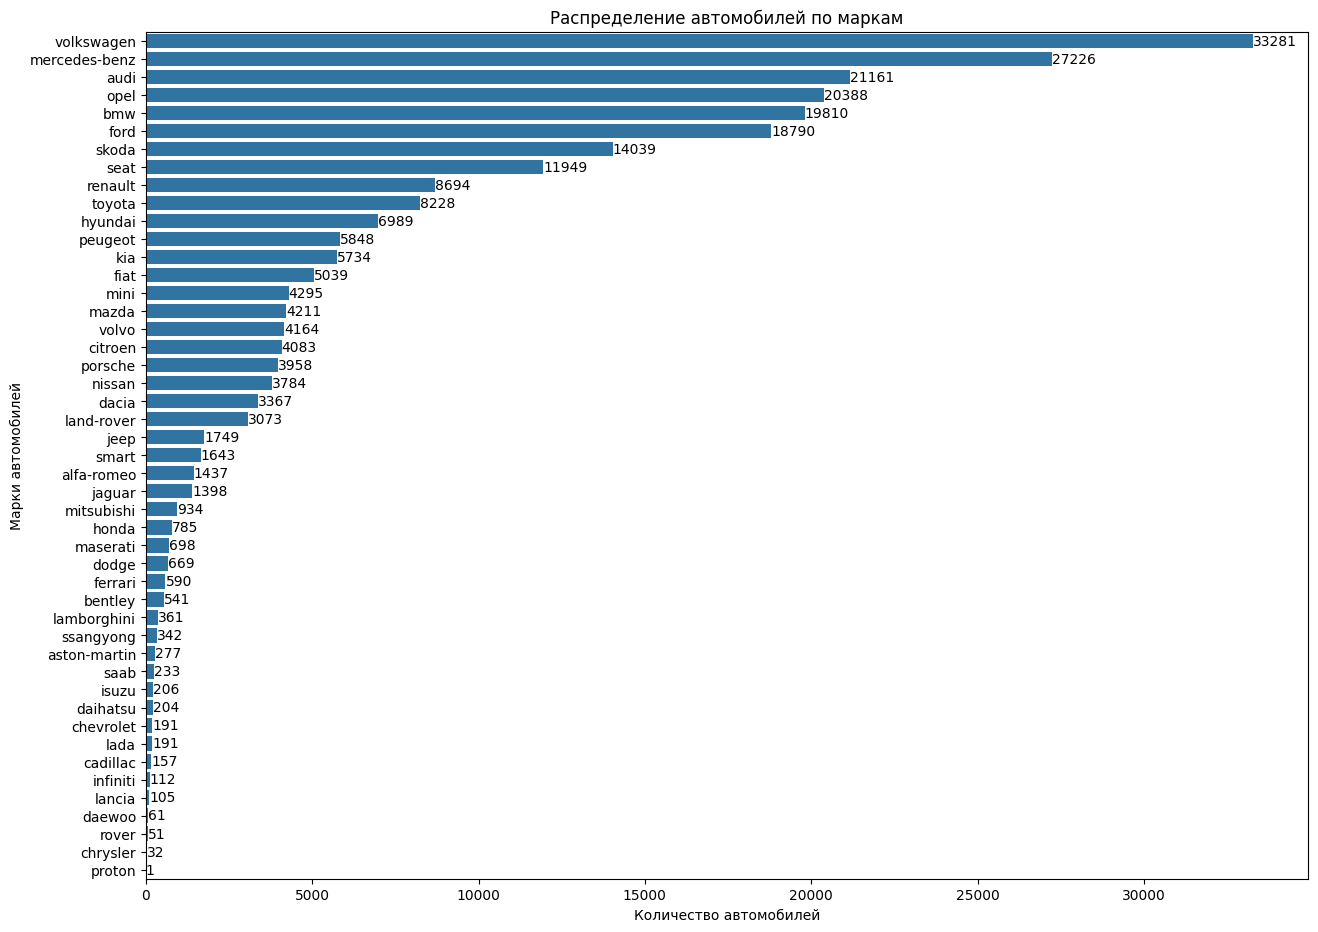

In [ ]:
plt.figure(figsize=[15,11])
ax = sns.countplot(data=data, y='brand', order = data['brand'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Распределение автомобилей по маркам")
plt.ylabel("Марки автомобилей")
plt.xlabel("Количество автомобилей")
plt.show()

Немецкие автомобили ожидаемо в топе. Посмотрим топ-10 самых популярных моделей.

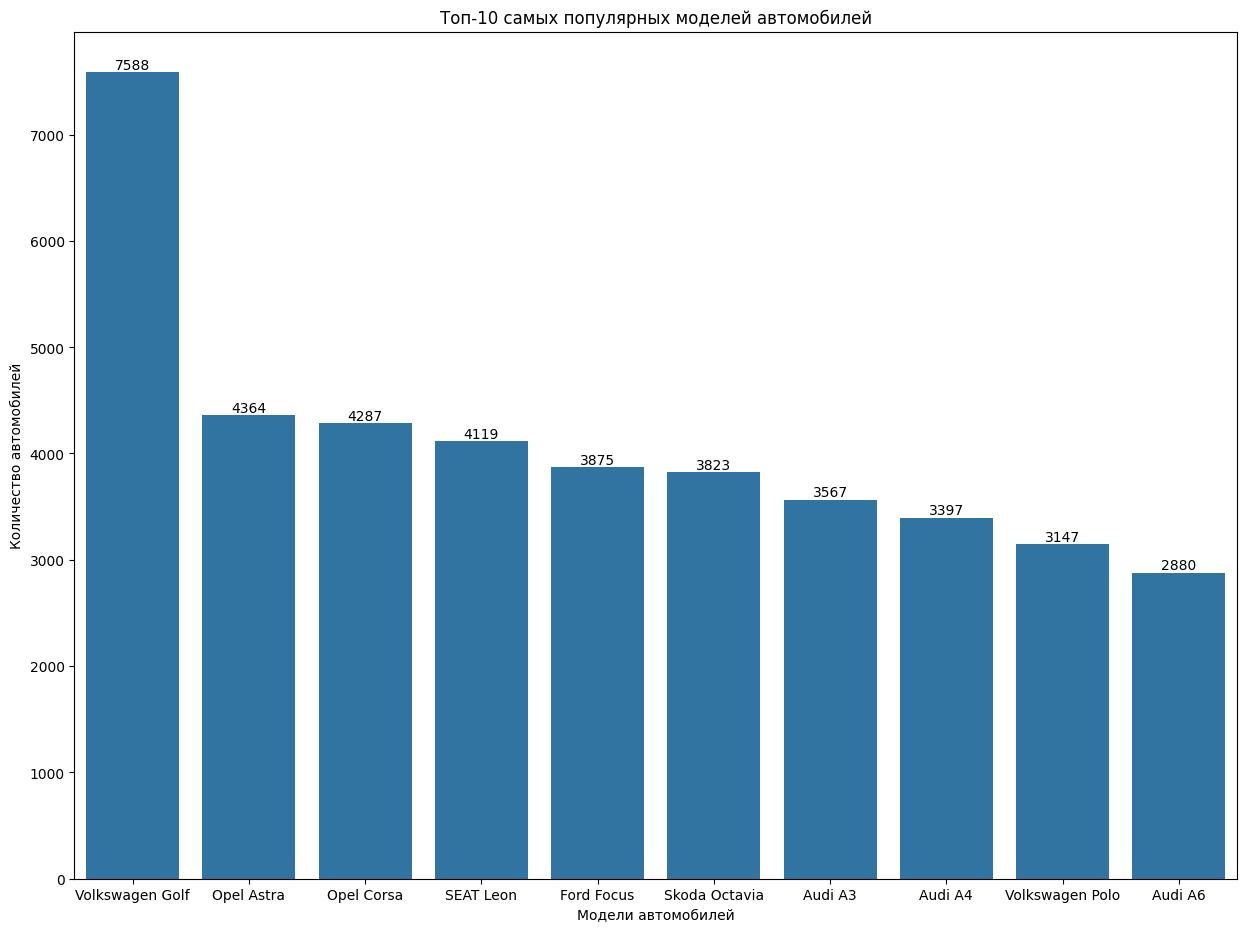

In [ ]:
plt.figure(figsize=[15,11])
ax = sns.countplot(data=data, x='model', order = data['model'].value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.title("Топ-10 самых популярных моделей автомобилей")
plt.ylabel("Количество автомобилей")
plt.xlabel("Модели автомобилей")
plt.show()

Немецкие автомобили, ожидаемо, снова в топе, Volksvagen Golf лидирует со значительным отрывом.

Посмотрим, как машины распределены по цветам.

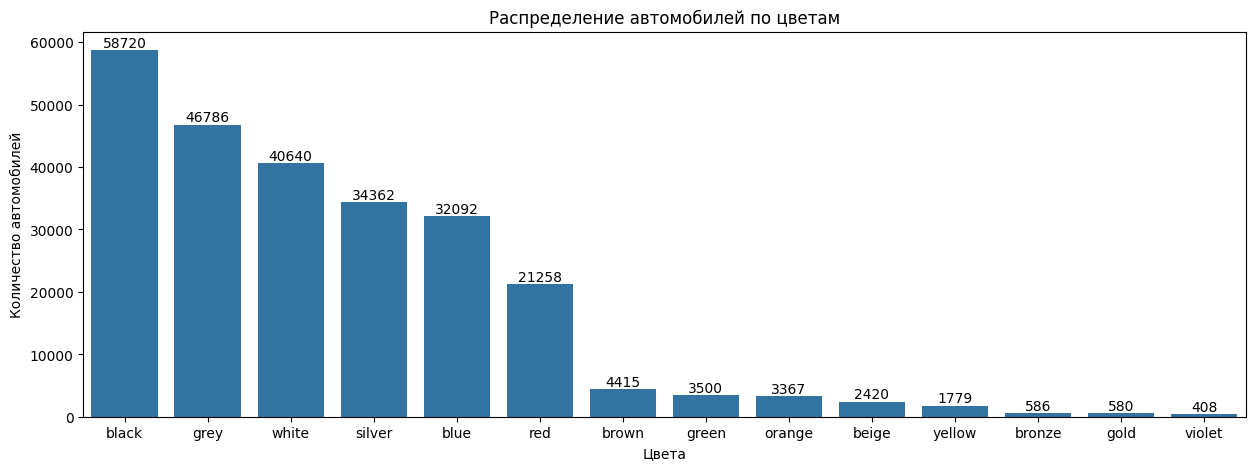

In [ ]:
plt.figure(figsize=[15,5])
ax = sns.countplot(data=data, x='color', order = data['color'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Распределение автомобилей по цветам")
plt.ylabel("Количество автомобилей")
plt.xlabel("Цвета")
plt.show()

Посмотрим на распределение автомобилей по году регистрации

In [ ]:
registration_year = data['registration_date'].dropna().dt.year.value_counts().sort_index()

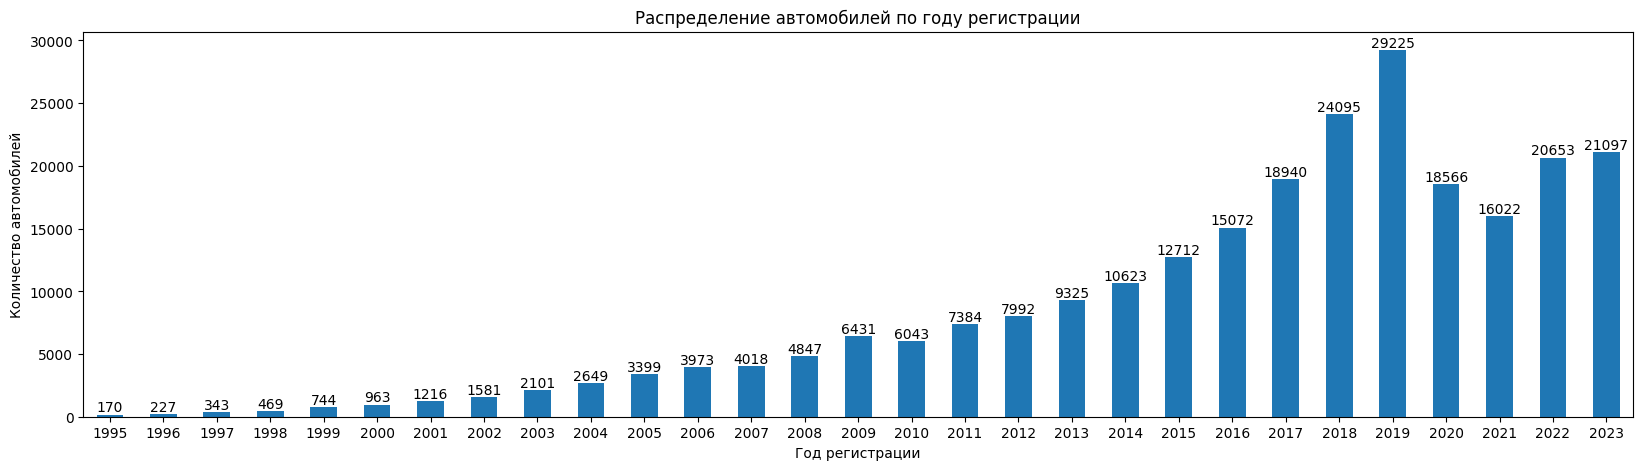

In [ ]:
plt.figure(figsize=[20,5])
ax = registration_year.plot.bar(x='registration_date', y='count', rot=0)
ax.bar_label(ax.containers[0])
plt.title("Распределение автомобилей по году регистрации")
plt.ylabel("Количество автомобилей")
plt.xlabel("Год регистрации")
plt.show()

По графику виден рост количества зарегистрированных автомобилей с заметным провалом в 2020м году. Возомжно, падение связано с пандемией. Посмотрим, как с годами изменяется дата производства автомобилей.

In [ ]:
yop = data['year'].dropna().value_counts().sort_index()

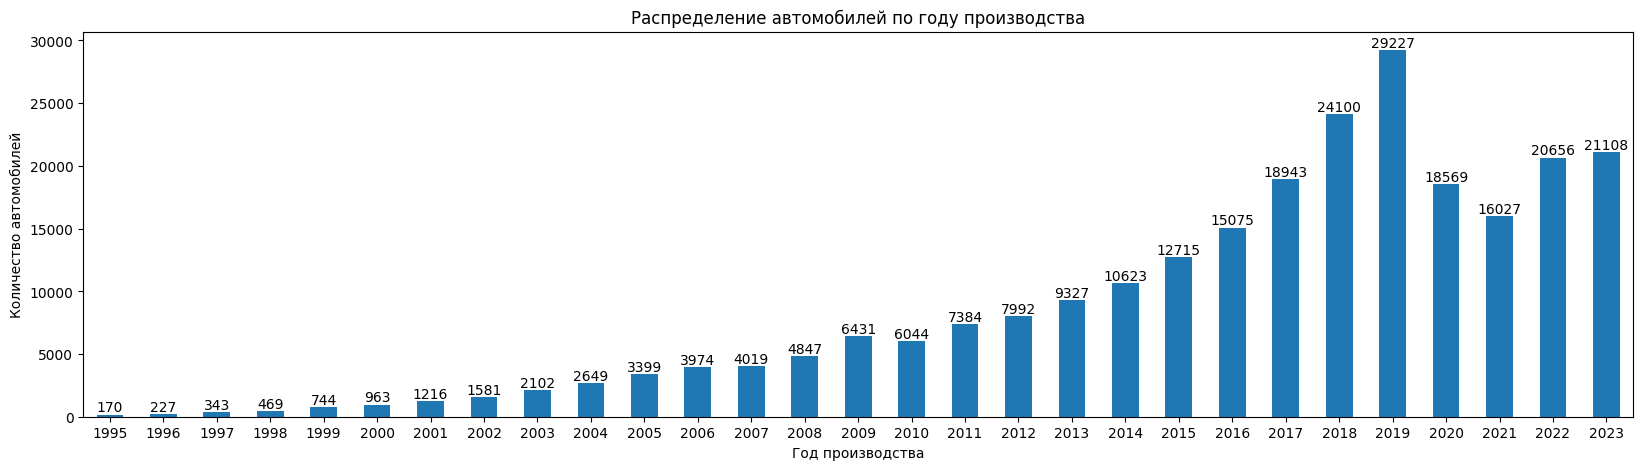

In [ ]:
plt.figure(figsize=[20,5])
ax = yop.plot.bar(x='year', y='count', rot=0)
ax.bar_label(ax.containers[0])
plt.title("Распределение автомобилей по году производства")
plt.ylabel("Количество автомобилей")
plt.xlabel("Год производства")
plt.show()

Видим картину, аналогичную графику регистраций по годам, с падением в районе 2020 и 2021 г.

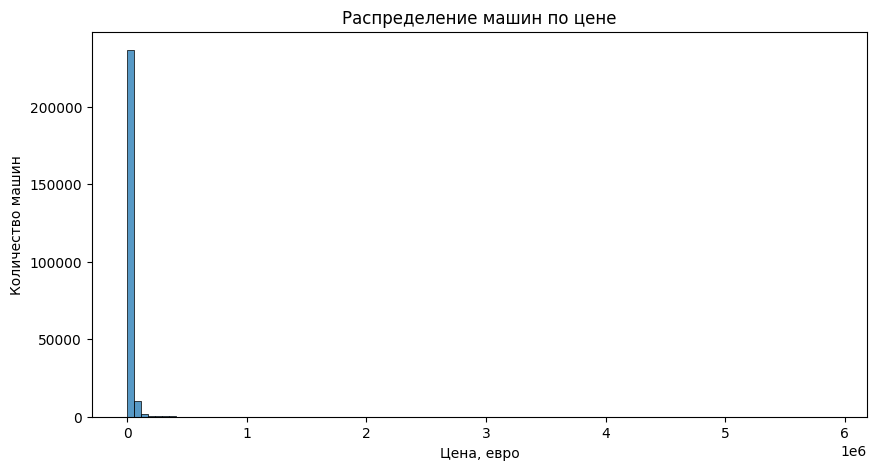

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data, x='price_in_euro', bins=100)
plt.title("Распределение машин по цене")
plt.ylabel("Количество машин")
plt.xlabel("Цена, евро")
plt.show()

График плохо читаем, подавляющее большинство машин находятся "слева". Судя по всему, датасет содержит экстремальные значения. Построим боксплот:

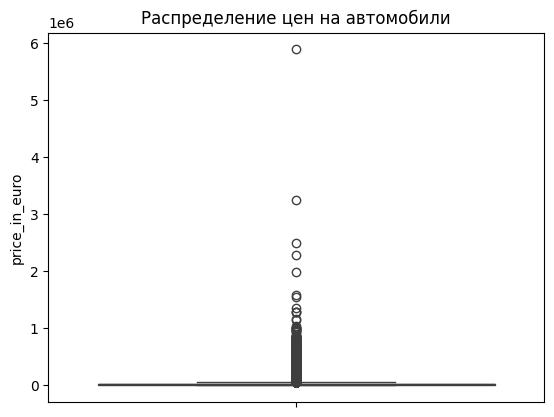

In [ ]:
sns.boxplot(data=data, y='price_in_euro')
plt.title("Распределение цен на автомобили")
plt.show()

График опять нечитаем. Описательная статистика показывает, что средняя цена автомобиля составляет 26138 евро, а максимальная -- 5890500. Посмотрим на медиану:

In [ ]:
data['price_in_euro'].median()

np.float64(19890.0)

Медиана составляет 19890 евро, что почти в 300 раз меньше максимума. Эти выбросы объяснимы: автомобили, как и многие другие продукты, имеют "люксовую" нишу с практически неограниченным потолком стоимости. Для дальнейшей работы напишем функцию, которая обращает экстремальные значения в np.nan с помощью IQR:

In [ ]:
def filter(data,feature):
    ''' фильтр обращает экстремальные значения в столбце feature для датафрейма data в np.nan
    экстремальные значения рассчитываются через IQR'''
    iqr = data[feature].quantile(0.75)-data[feature].quantile(0.25) #расчет IQR
    lower_bound = data[feature].quantile(0.25)-1.5*iqr #нижние и верхние границы
    upper_bound = data[feature].quantile(0.75)+1.5*iqr
    data.loc[~data[feature].between(lower_bound,upper_bound), feature] = np.nan #все, что не попадает в IQR, обращаем в np.nan
    return data

In [ ]:
data_filtered = data.copy() #будем фильтровать копию исходного датафрейма

In [ ]:
data_filtered = filter(data_filtered,'price_in_euro')

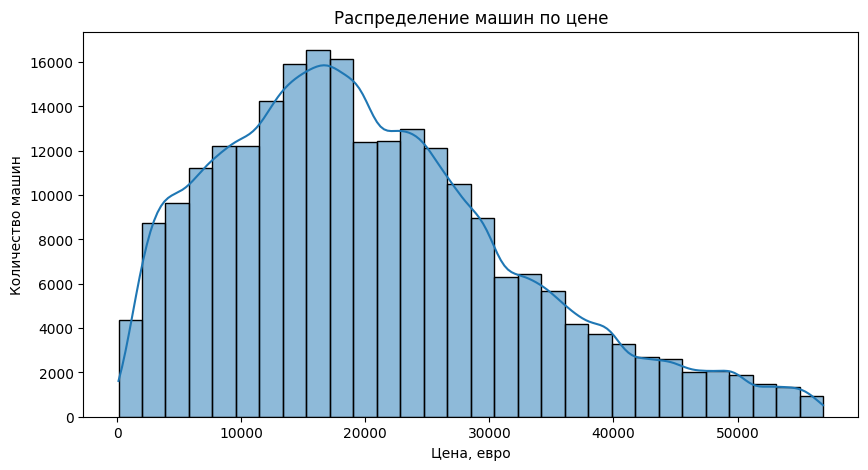

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data_filtered, x='price_in_euro', bins=30, kde=True)
plt.title("Распределение машин по цене")
plt.ylabel("Количество машин")
plt.xlabel("Цена, евро")
plt.show()

По графику видим распределение, сильно скошенное влево (в сторону меньшей цены). Следующая метрика -- мощность силовой установки.

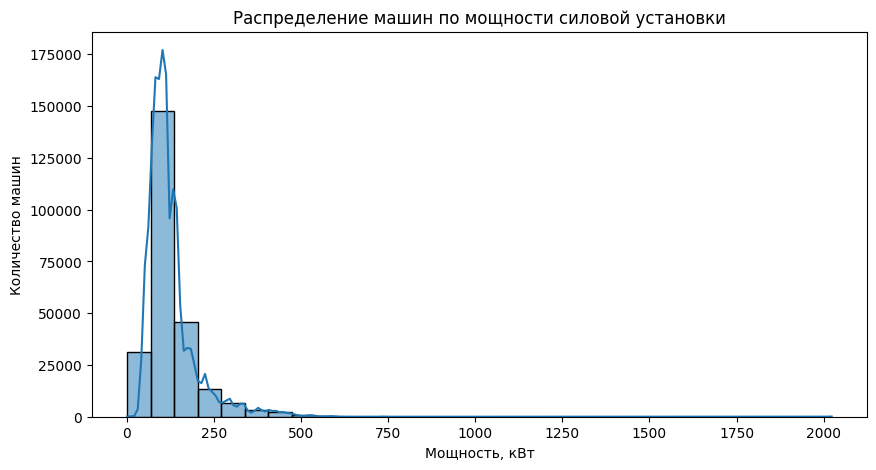

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data, x='power_kw', bins=30, kde=True)
plt.title("Распределение машин по мощности силовой установки")
plt.ylabel("Количество машин")
plt.xlabel("Мощность, кВт")
plt.show()

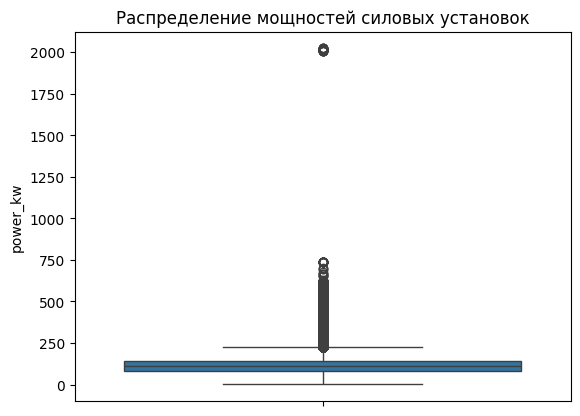

In [ ]:
sns.boxplot(data=data, y='power_kw')
plt.title("Распределение мощностей силовых установок")
plt.show()

Снова видим значительное влияние выбросов. Отфильтруем данные аналогично предыдущему пункту.

In [ ]:
data_filtered = filter(data_filtered,'power_kw')

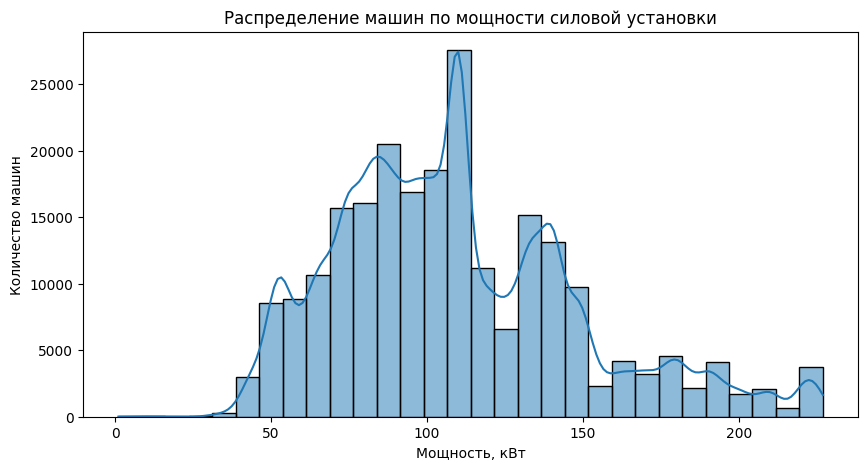

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data_filtered, x='power_kw', bins=30, kde=True)
plt.title("Распределение машин по мощности силовой установки")
plt.ylabel("Количество машин")
plt.xlabel("Мощность, кВт")
plt.show()

График показывает распределение, близкое к нормальному. Для мощности в ЛС сразу отфильтруем выбросы.

In [ ]:
data_filtered = filter(data_filtered,'power_ps')

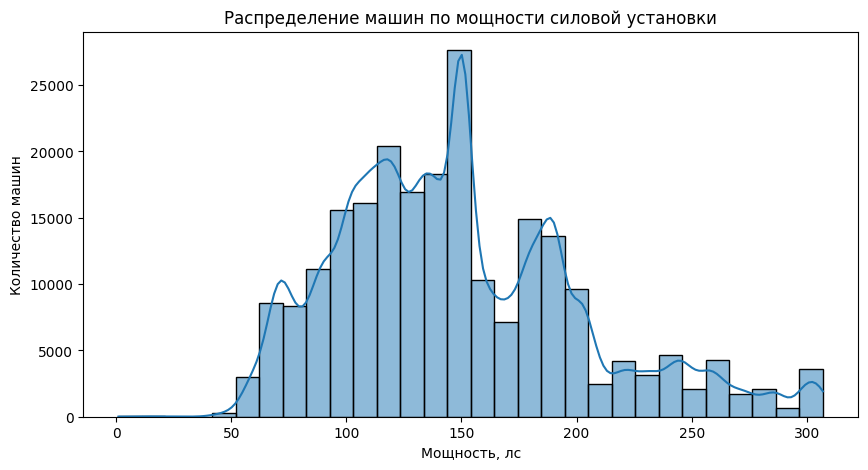

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data_filtered, x='power_ps', bins=30, kde=True)
plt.title("Распределение машин по мощности силовой установки")
plt.ylabel("Количество машин")
plt.xlabel("Мощность, лс")
plt.show()

График полностью совпадает с графиком для мощности в кВт, что ожидаемо, поскольку мощность в кВт и лс связана по формуле кВт=1.3596*ЛС.

Посмотрим, как автомобили распределены по типу трансмиссии.

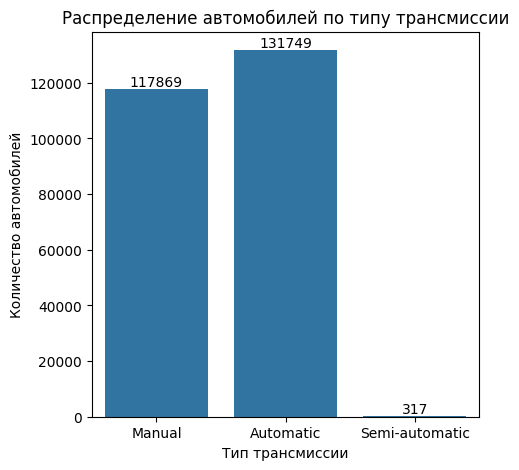

In [ ]:
plt.figure(figsize=[5,5])
ax = sns.countplot(data=data, x='transmission_type')
ax.bar_label(ax.containers[0])
plt.title("Распределение автомобилей по типу трансмиссии")
plt.ylabel("Количество автомобилей")
plt.xlabel("Тип трансмиссии")
plt.show()

Самыми популярными являются автомобили с автоматической КП, немного отстают автомобили с ручной КП. Автомобили с полуавтоматической КП почти не представлены. Посмотрим распределение по типу двигателя.

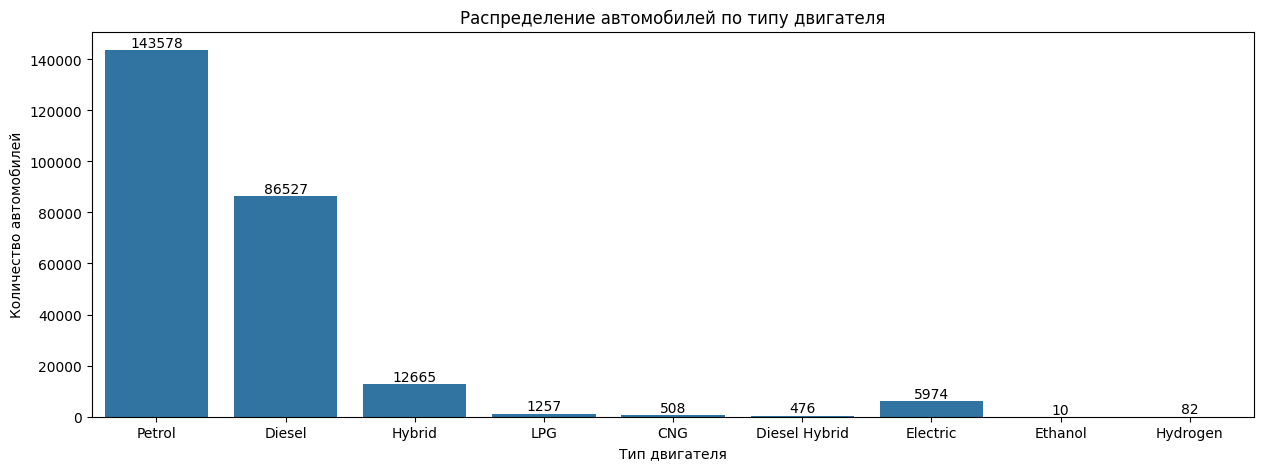

In [ ]:
plt.figure(figsize=[15,5])
ax = sns.countplot(data=data, x='fuel_type')
ax.bar_label(ax.containers[0])
plt.title("Распределение автомобилей по типу двигателя")
plt.ylabel("Количество автомобилей")
plt.xlabel("Тип двигателя")
plt.show()

Ожидаемо, заметно лидирут автомобили с бензиновым и дизельным двигателем

Посмотрим на распределение по расходу топлива:

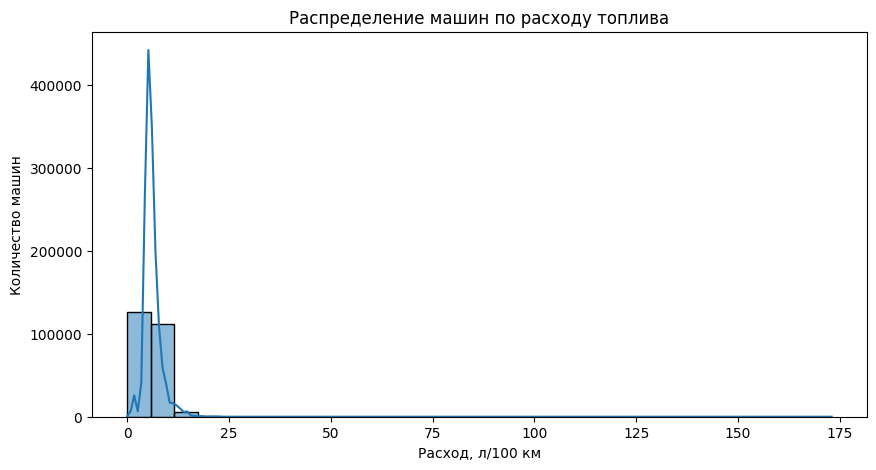

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data, x='fuel_consumption_l_100km', bins=30, kde=True)
plt.title("Распределение машин по расходу топлива")
plt.ylabel("Количество машин")
plt.xlabel("Расход, л/100 км")
plt.show()

Опять видим, что данные подвержены выбросам. Отфильтруем их

In [ ]:
data_filtered = filter(data_filtered,'fuel_consumption_l_100km')

In [ ]:
data_filtered = filter(data_filtered,'fuel_consumption_g_km')

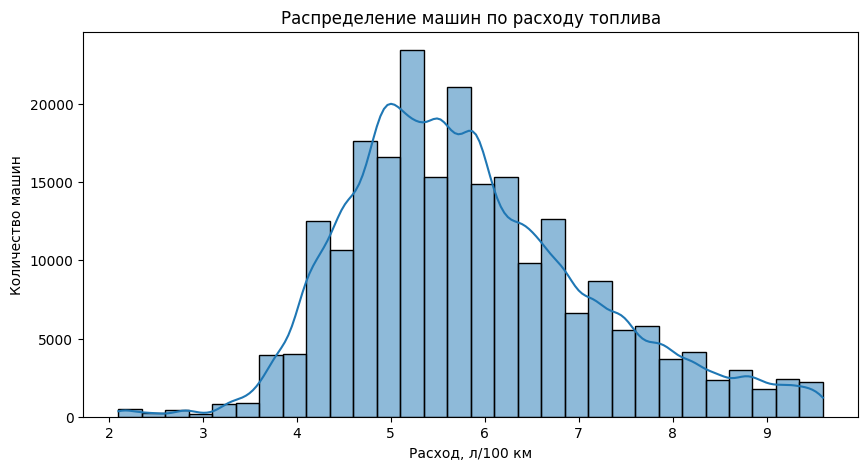

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data_filtered, x='fuel_consumption_l_100km', bins=30, kde=True)
plt.title("Распределение машин по расходу топлива")
plt.ylabel("Количество машин")
plt.xlabel("Расход, л/100 км")
plt.show()

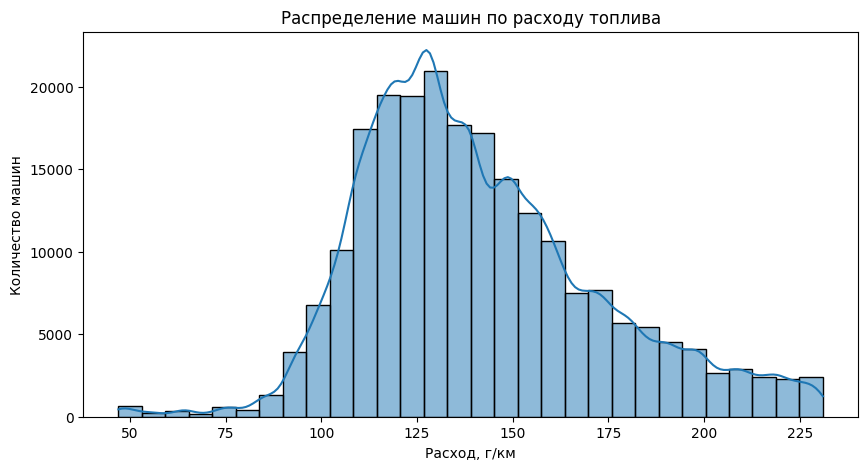

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data_filtered, x='fuel_consumption_g_km', bins=30, kde=True)
plt.title("Распределение машин по расходу топлива")
plt.ylabel("Количество машин")
plt.xlabel("Расход, г/км")
plt.show()

В обоих случаях видим распределение, близкое к нормальному. Графики немного отличаются друг от друга: возможно это связано с различной плотностью используемого топлива, что усложняет перевод из грамм в литры.

 Посмотрим последний признак: пробег.

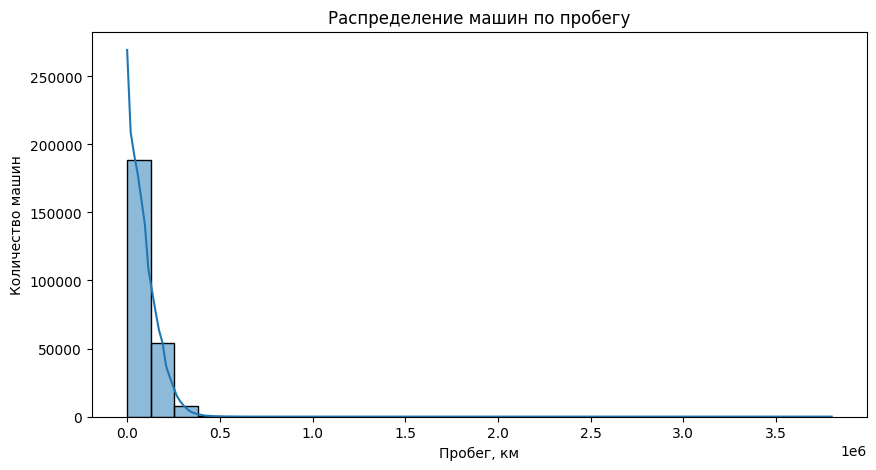

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data_filtered, x='mileage_in_km', bins=30, kde=True)
plt.title("Распределение машин по пробегу")
plt.ylabel("Количество машин")
plt.xlabel("Пробег, км")
plt.show()

Снова почистим данные от выбросов:

In [ ]:
data_filtered = filter(data_filtered,'mileage_in_km')

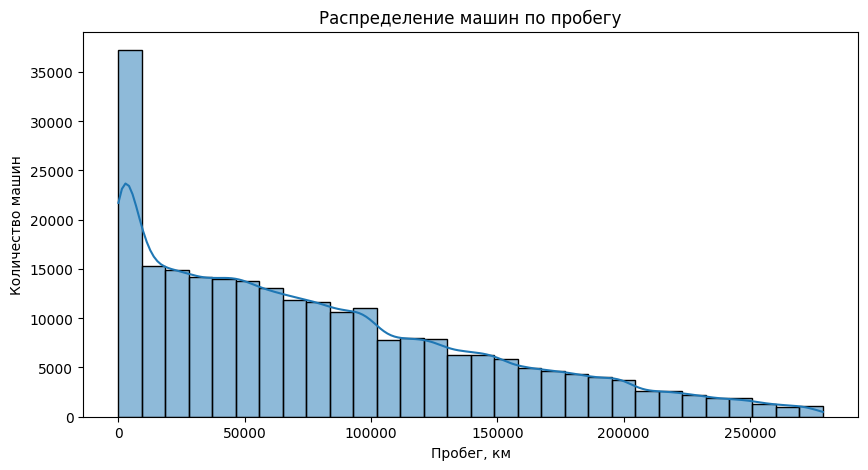

In [ ]:
plt.figure(figsize=[10, 5])
sns.histplot(data=data_filtered, x='mileage_in_km', bins=30, kde=True)
plt.title("Распределение машин по пробегу")
plt.ylabel("Количество машин")
plt.xlabel("Пробег, км")
plt.show()

График показывает, что значительное число автомобилей продаются "с конвейера". Перед переходом к следующему шагу, посмотрим, как фильтры повлияли на пропуски в датасете.

In [ ]:
data.isna().sum()/len(data)*100

,0
brand,0.000000
model,0.000000
color,0.066115
registration_date,0.079258
year,0.061734
price_in_euro,0.079258
power_kw,0.000398
power_ps,0.083639
transmission_type,0.455633
fuel_type,0.000797


In [ ]:
data_filtered.isna().sum()/len(data)*100

,0
brand,0.000000
model,0.000000
color,0.066115
registration_date,0.079258
year,0.061734
price_in_euro,6.290849
power_kw,7.981950
power_ps,8.097451
transmission_type,0.455633
fuel_type,0.000797


Видим, что пропусков стало большьше. Несмотря на это, применения фильтров позволило провести базовый EDA и построить важные визуализации.

Важно отметить, что отфильтрованный датасет нельзя использовать изолированно от основного, поскольку выбросы в основном датасете могут нести важную смысловую нагрузку (например, если мы хотим исследовать цены на люксовые автомобили).

В случае с другими признаками, такими как пробег или потребление топлива, выбросы могут быть продуктами обработки и очистки данных.

# 4. Углубленные исследования

На основе исходного и отфильтрованного датасетов, попробуем ответить на несколько вопросов о данных.

* Как выглядит распределение стоимости самой популярной модели в зависимости от времени производства?
* В списке брендов есть LADA. Датасет позволяет ответить на вопрос о том, какие модели российских машин пользуются спросом на немецком рынке. Я слышал, что немцы любят Нивы, было бы интересно узнать, так ли это.
* Как законодательство ЕС повлияло на автомобильную индустрию? Разумно предположить, что со временем производство электромобилей выросло, а автомобилей с ДВС -- упало. Так ли это?
* Какие автомобили дороже -- с автоматической или ручной КП?
* Стали ли двигатели внутреннего сгорания более экономичными?
* Как данные коррелируют между собой?


## 4.1. Динамика стоимости самой популярной в зависимости от года выпуска.


Как выглядит распределение стоимости самой популярной модели в зависимости от времени производства?

In [ ]:
print('Самая популярная модель:', data['model'].mode()[0])

Самая популярная модель: Volkswagen Golf


In [ ]:
golf = data_filtered.loc[data_filtered['model'] == 'Volkswagen Golf'][['year','price_in_euro']].groupby('year').median().reset_index()

<Figure size 1500x500 with 0 Axes>

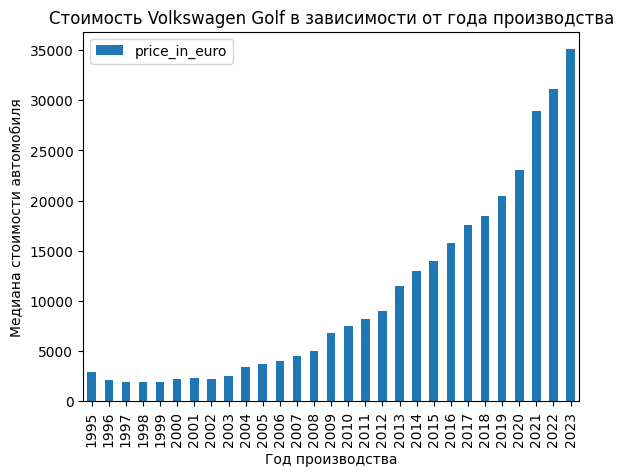

In [ ]:
plt.figure(figsize=[15,5])
ax = golf.plot.bar(x='year', y='price_in_euro')
plt.title("Стоимость Volkswagen Golf в зависимости от года производства")
plt.ylabel("Медиана стоимости автомобиля")
plt.xlabel("Год производства")
plt.show()

Новые автомобили заметно дороже подержаных. По графику также заметен резкий рост стоимости автомобилей, произведенных в период пандемии (2021+).

## 4.2. Российские автомобили на немецком рынке

Датасет позволяет ответить на вопрос о том, какие модели российских машин пользуются спросом на немецком рынке. Я слышал, что немцы любят Нивы, было бы интересно узнать, так ли это.

In [ ]:
lada = data.loc[data['brand'] == 'lada']

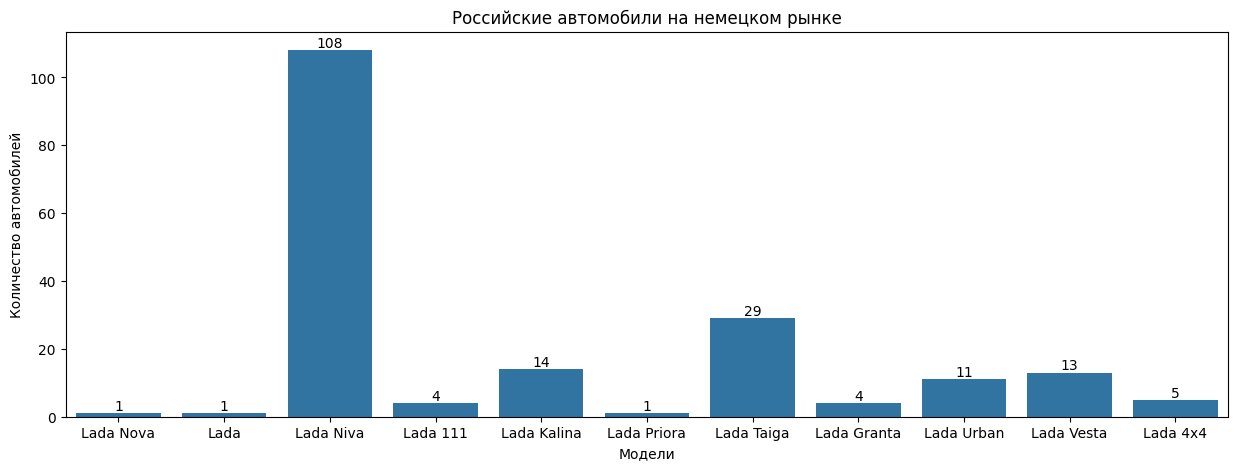

In [ ]:
plt.figure(figsize=[15,5])
ax = sns.countplot(data=lada, x='model')
ax.bar_label(ax.containers[0])
plt.title("Российские автомобили на немецком рынке")
plt.ylabel("Количество автомобилей")
plt.xlabel("Модели")
plt.show()

Действительно, Нива оказалась самым популярным российским автомобилем на немецком рынке (Lada Taiga, Urban и 4x4 также являются модификациями Нивы)

## 4.3. Динамика производства автомобилей с различными типами силовых установок
Как законодательство ЕС повлияло на автомобильную индустрию? Разумно предположить, что со временем производство электромобилей выросло, а автомобилей с ДВС -- упало. Так ли это?

Поскольку данные будут зависить от общего объема выпуска автомобилей, возможно, есть смысл рассматривать выпуск автомобилей с конкретным типом двигателя в процентах относительно общего объема машин, произведенных в этом году.

In [ ]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'CNG', 'Diesel Hybrid',
       'Electric', 'Ethanol', 'Hydrogen', nan], dtype=object)

In [ ]:
fuel = pd.DataFrame()

In [ ]:
fuel['Бензин'] = (data.loc[data['fuel_type'] == 'Petrol']['year'].dropna().value_counts()/data['year'].dropna().value_counts()*100).sort_index()

In [ ]:
fuel['Дизель'] = (data.loc[data['fuel_type'] == 'Diesel']['year'].dropna().value_counts()/data['year'].dropna().value_counts()*100).sort_index()

In [ ]:
fuel['Гибрид'] = (data.loc[data['fuel_type'] == 'Hybrid']['year'].dropna().value_counts()/data['year'].dropna().value_counts()*100).sort_index()

In [ ]:
fuel['Электрический'] = (data.loc[data['fuel_type'] == 'Electric']['year'].dropna().value_counts()/data['year'].dropna().value_counts()*100).sort_index()

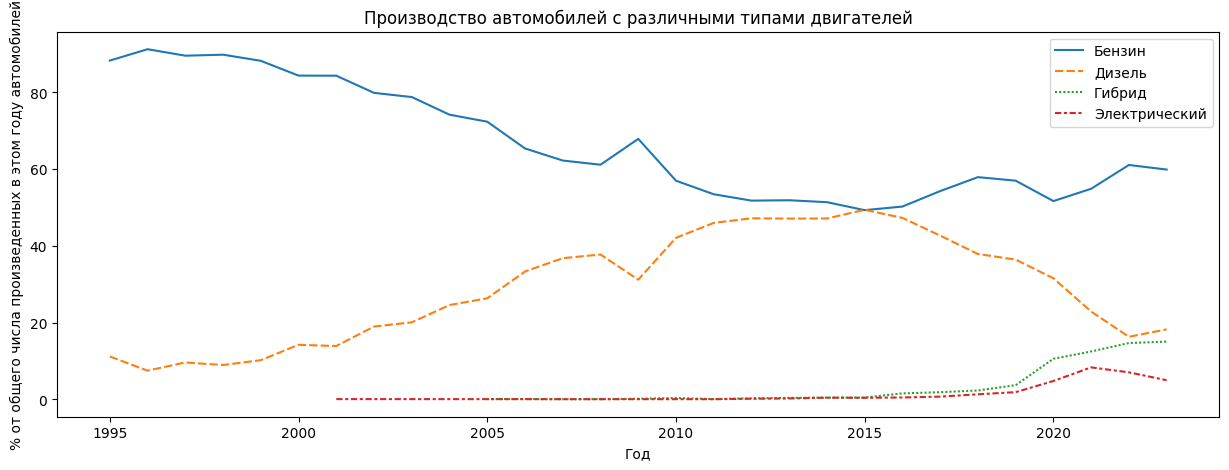

In [ ]:
plt.figure(figsize=[15,5])
ax = sns.lineplot(fuel)
plt.title("Производство автомобилей с различными типами двигателей")
plt.ylabel("% от общего числа произведенных в этом году автомобилей")
plt.xlabel("Год")
plt.show()

График демонстрирует доминирующее положение автомобилей с бензиновыми двигателями, несмотря на то, что в 2015м году их производство сравнялось с производством автомобилей с дизельным ДВС. Однако, после 2015, отмечается заметное падение в производстве автомобилей с дизельными двигателями. Возможно это связано с "дизельгейтом" [ https://en.wikipedia.org/wiki/Volkswagen_emissions_scandal ] и изменениями в законодательстве ЕС. Ближе к 2020м наблюдается рост производства автомобилей с гибридными- и электродвигателям.

## 4.4. Распределение стоимостей автомобилей в зависимости от типа трансмиссии

Какие автомобили дороже -- с автоматической или ручной КП?

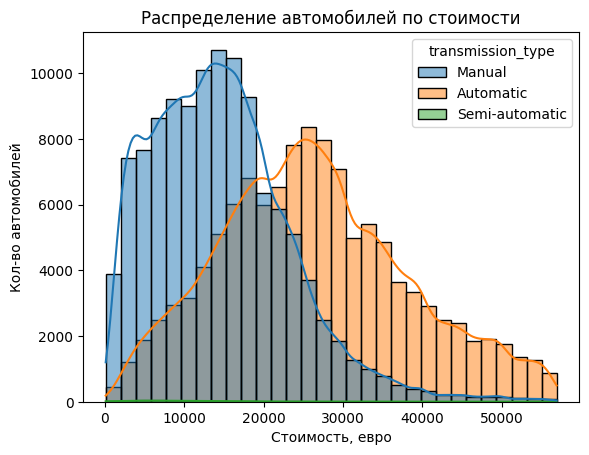

In [ ]:
sns.histplot(data_filtered, x='price_in_euro', hue='transmission_type', bins = 30, kde=True)
plt.title('Распределение автомобилей по стоимости')
plt.ylabel("Кол-во автомобилей")
plt.xlabel("Стоимость, евро")
plt.show()

In [ ]:
print('Медицана стоимости автомобилей с ручной КП:', data_filtered.loc[data_filtered['transmission_type'] == 'Manual']['price_in_euro'].median())
print('Медицана стоимости автомобилей с автоматической КП:', data_filtered.loc[data_filtered['transmission_type'] == 'Automatic']['price_in_euro'].median())

Медицана стоимости автомобилей с ручной КП: 13900.0
Медицана стоимости автомобилей с автоматической КП: 25500.0


Исследование показывает, что автомобили c АКП стоят значительно дороже, чем автомобили с ручной коробкой передач.

## 4.5. Экономичность ДВС

Стали ли двигатели внутреннего сгорания более экономичными? Построим график со средним потреблением топлива для различных типов ДВС в зависимости от года производства.

In [ ]:
cons_l = pd.DataFrame()
cons_l['Бензин'] = data_filtered.loc[data['fuel_type'] == 'Petrol'][['year','fuel_consumption_l_100km']].groupby('year').mean()
cons_l['Дизель'] = data_filtered.loc[data['fuel_type'] == 'Diesel'][['year','fuel_consumption_l_100km']].groupby('year').mean()

In [ ]:
cons_g = pd.DataFrame()
cons_g['Бензин'] = data_filtered.loc[data['fuel_type'] == 'Petrol'][['year','fuel_consumption_g_km']].groupby('year').mean()
cons_g['Дизель'] = data_filtered.loc[data['fuel_type'] == 'Diesel'][['year','fuel_consumption_g_km']].groupby('year').mean()

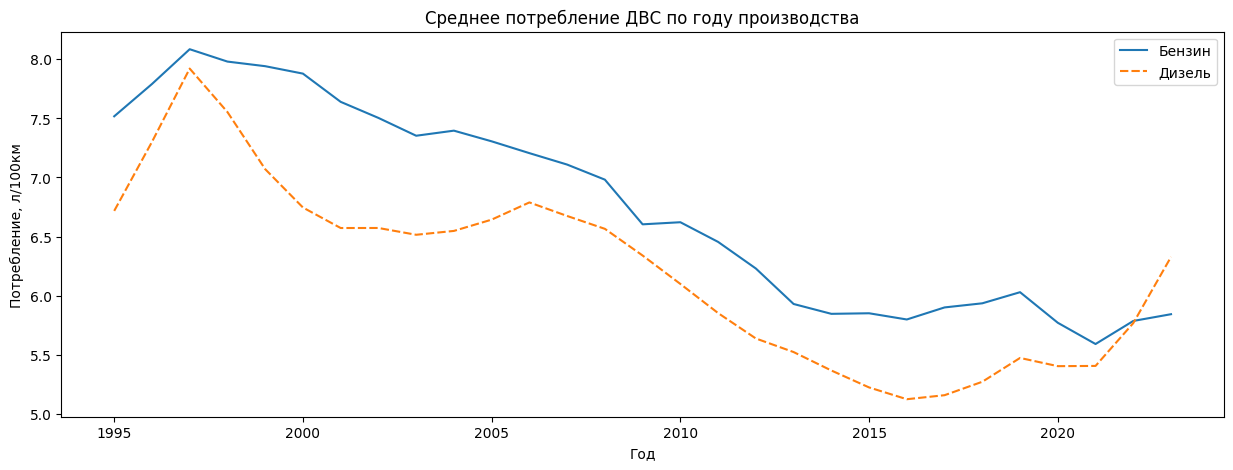

In [ ]:
plt.figure(figsize=[15,5])
ax = sns.lineplot(cons_l)
plt.title("Среднее потребление ДВС по году производства")
plt.ylabel("Потребление, л/100км")
plt.xlabel("Год")
plt.show()

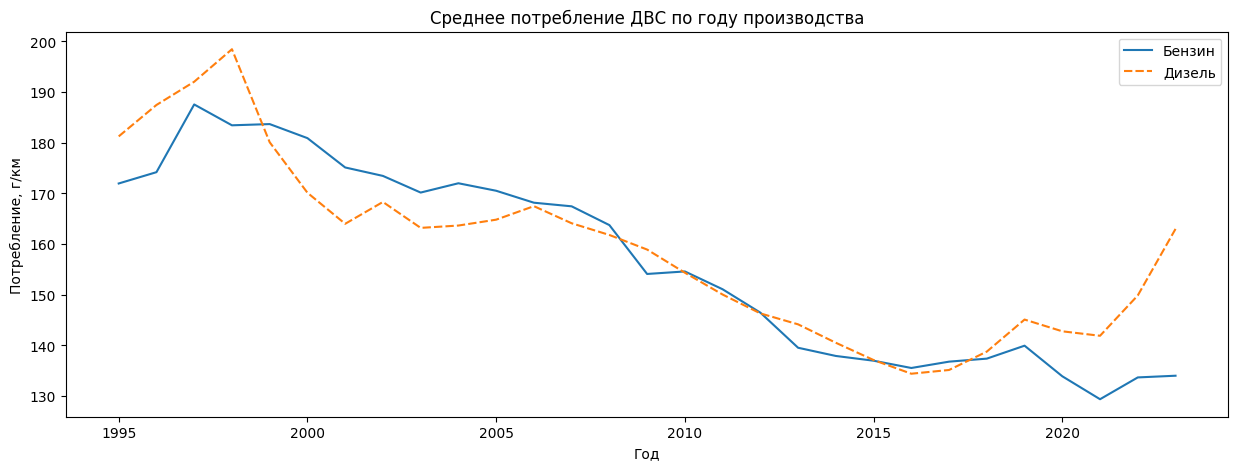

In [ ]:
plt.figure(figsize=[15,5])
ax = sns.lineplot(cons_g)
plt.title("Среднее потребление ДВС по году производства")
plt.ylabel("Потребление, г/км")
plt.xlabel("Год")
plt.show()

Графики демонстрируют тенденцию к падению потребления топлива.
Однако, машины, произведенные после 2021г показывают тенденцию к увеличению потребления топлива. Возможно это связано с увеличением объемов производства крупогабаритной техники относительно легковых автомобилей (что особенно актуально для автомобилей с дизельными двигателями). К сожалению, датасет не позволяет более подробно рассмотреть причины этого изменения.

## 4.6. Таблица корреляции

In [ ]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 9.3 MB/s eta 0:00:00


interval columns not set, guessing: ['year', 'price_in_euro', 'power_kw', 'power_ps', 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km']


/usr/local/lib/python3.11/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable model is large: 1312. Are you sure this is not an interval variable? Analysis for pairs of variables including model can be slow.
  warnings.warn(


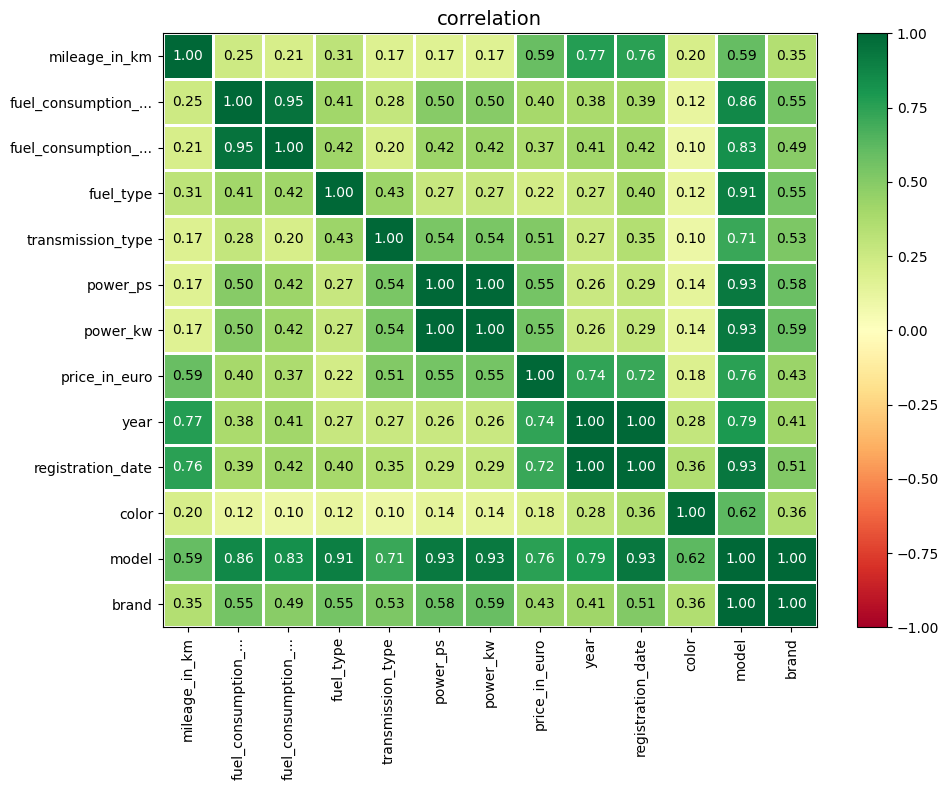

In [ ]:
phik_overview = data_filtered.phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))

Проанализируем таблицу корреляции:
* Самый высокий коэффициент корреляции у пары "потребление топлива (г-л)". Этот результат ожидаем, поскольку потребление в граммах и литрах связано математически. Также коэффициент корреляции равен 1 у пары модель-бренд, что также ожидаемо (бренды производят фиксированное количество "своих" моделей)
* Из рассматриваемых столбцов "модель" показывает наиболее высокую корреляцию со всем остальными столбцами.
* Интересно, что существует слабая корреляция (0.36) между цветом машины и годом ее регистрации. Возможно, это указывает на тренды во внешнем оформлении автомобилей.
* Стоимость автомобиля сильнее всего зависит от пробега, года выпуска и регистрации, а также модели